In [1]:
import numpy as np
import pandas as pd
from scipy import stats
from datetime import datetime
from collections import Counter
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
plt.style.use('seaborn-white')
orange, purple, elm ='#FFCC00', '#666599', '#217C7E'
blue, red, grey, green ='#336699', '#9A3334', '#AAAAAA', '#335333'
%matplotlib inline
mydpi=600
s=18

countries = ['AU', 'GB', 'IN', 'NG', 'US']
country_labels = ['Australia', 'Britain', 'India', 'Nigeria', 'US']

__author__ = 'HK Dambanemuya'
__version__ = 'Python3'

In [2]:
print ("Reading COVID-19 Cases Data...")
cases = pd.read_csv('../../Data/Cases/WHO-COVID-19-global-data.csv')
# Data Source: https://covid19.who.int/table?tableChartType=heat

print ("Aggregating COVID-19 Cases by Country")
covid_df = cases[[' Country_code', ' Cumulative_cases']].groupby(' Country_code').agg('max').reset_index()
covid_df.columns = ['country','cases']
covid_df.head()

print ("Preparing COVID-19 Min-Max Dates")
case_dates_df = cases[[' Country_code', 'Date_reported']].groupby(' Country_code').agg(['min', 'max'])

print ("Reading News...")
news = pd.read_csv("../../Data/Fusion/news.csv")
news = news[news['length']>100]
news['date'] = [datetime.strftime(pd.to_datetime(date), '%Y-%m-%d') for date in tqdm_notebook(news['date'])]

print ("Reading Blogs...")
blogs = pd.read_csv("../../Data/Fusion/blogs.csv")
blogs = blogs[blogs['length']>100]
blogs['date'] = [datetime.strftime(pd.to_datetime(date), '%Y-%m-%d') for date in tqdm_notebook(blogs['date'])]

print ("Reading Discussions...")
discussions = pd.read_csv("../../Data/Fusion/discussions.csv")
discussions = discussions[discussions['length']>100]
discussions['date'] = [datetime.strftime(pd.to_datetime(date), '%Y-%m-%d') for date in tqdm_notebook(discussions['date'])]

dates = sorted(list(set(news['date']).union(set(blogs['date'])).union(set(discussions['date']))))[1:-1]

Reading COVID-19 Cases Data...
Aggregating COVID-19 Cases by Country
Preparing COVID-19 Min-Max Dates
Reading News...



Reading Blogs...



Reading Discussions...


In [3]:
sorted([x for x in list(Counter(news['country']).keys()) if x==x])

['AE',
 'AF',
 'AG',
 'AI',
 'AL',
 'AM',
 'AO',
 'AP',
 'AR',
 'AS',
 'AT',
 'AU',
 'AW',
 'AX',
 'AZ',
 'BA',
 'BB',
 'BD',
 'BE',
 'BF',
 'BG',
 'BH',
 'BM',
 'BN',
 'BO',
 'BR',
 'BT',
 'BW',
 'BY',
 'BZ',
 'CA',
 'CC',
 'CD',
 'CF',
 'CH',
 'CI',
 'CL',
 'CM',
 'CN',
 'CO',
 'CR',
 'CU',
 'CW',
 'CY',
 'CZ',
 'DE',
 'DJ',
 'DK',
 'DM',
 'DO',
 'EC',
 'EE',
 'EG',
 'ES',
 'ET',
 'EU',
 'FI',
 'FJ',
 'FM',
 'FO',
 'FR',
 'GA',
 'GB',
 'GD',
 'GE',
 'GG',
 'GH',
 'GI',
 'GM',
 'GR',
 'GT',
 'GU',
 'GY',
 'HK',
 'HN',
 'HR',
 'HU',
 'HW',
 'ID',
 'IE',
 'IL',
 'IM',
 'IN',
 'IO',
 'IQ',
 'IR',
 'IS',
 'IT',
 'JE',
 'JM',
 'JO',
 'JP',
 'KE',
 'KG',
 'KH',
 'KI',
 'KN',
 'KR',
 'KS',
 'KY',
 'KZ',
 'LA',
 'LB',
 'LI',
 'LK',
 'LS',
 'LT',
 'LU',
 'LV',
 'LY',
 'MA',
 'MC',
 'MD',
 'ME',
 'MH',
 'MK',
 'ML',
 'MM',
 'MN',
 'MO',
 'MP',
 'MR',
 'MS',
 'MT',
 'MU',
 'MV',
 'MW',
 'MX',
 'MY',
 'MZ',
 'NG',
 'NI',
 'NK',
 'NL',
 'NO',
 'NP',
 'NU',
 'NZ',
 'OM',
 'PA',
 'PE',
 'PF',
 'PG',

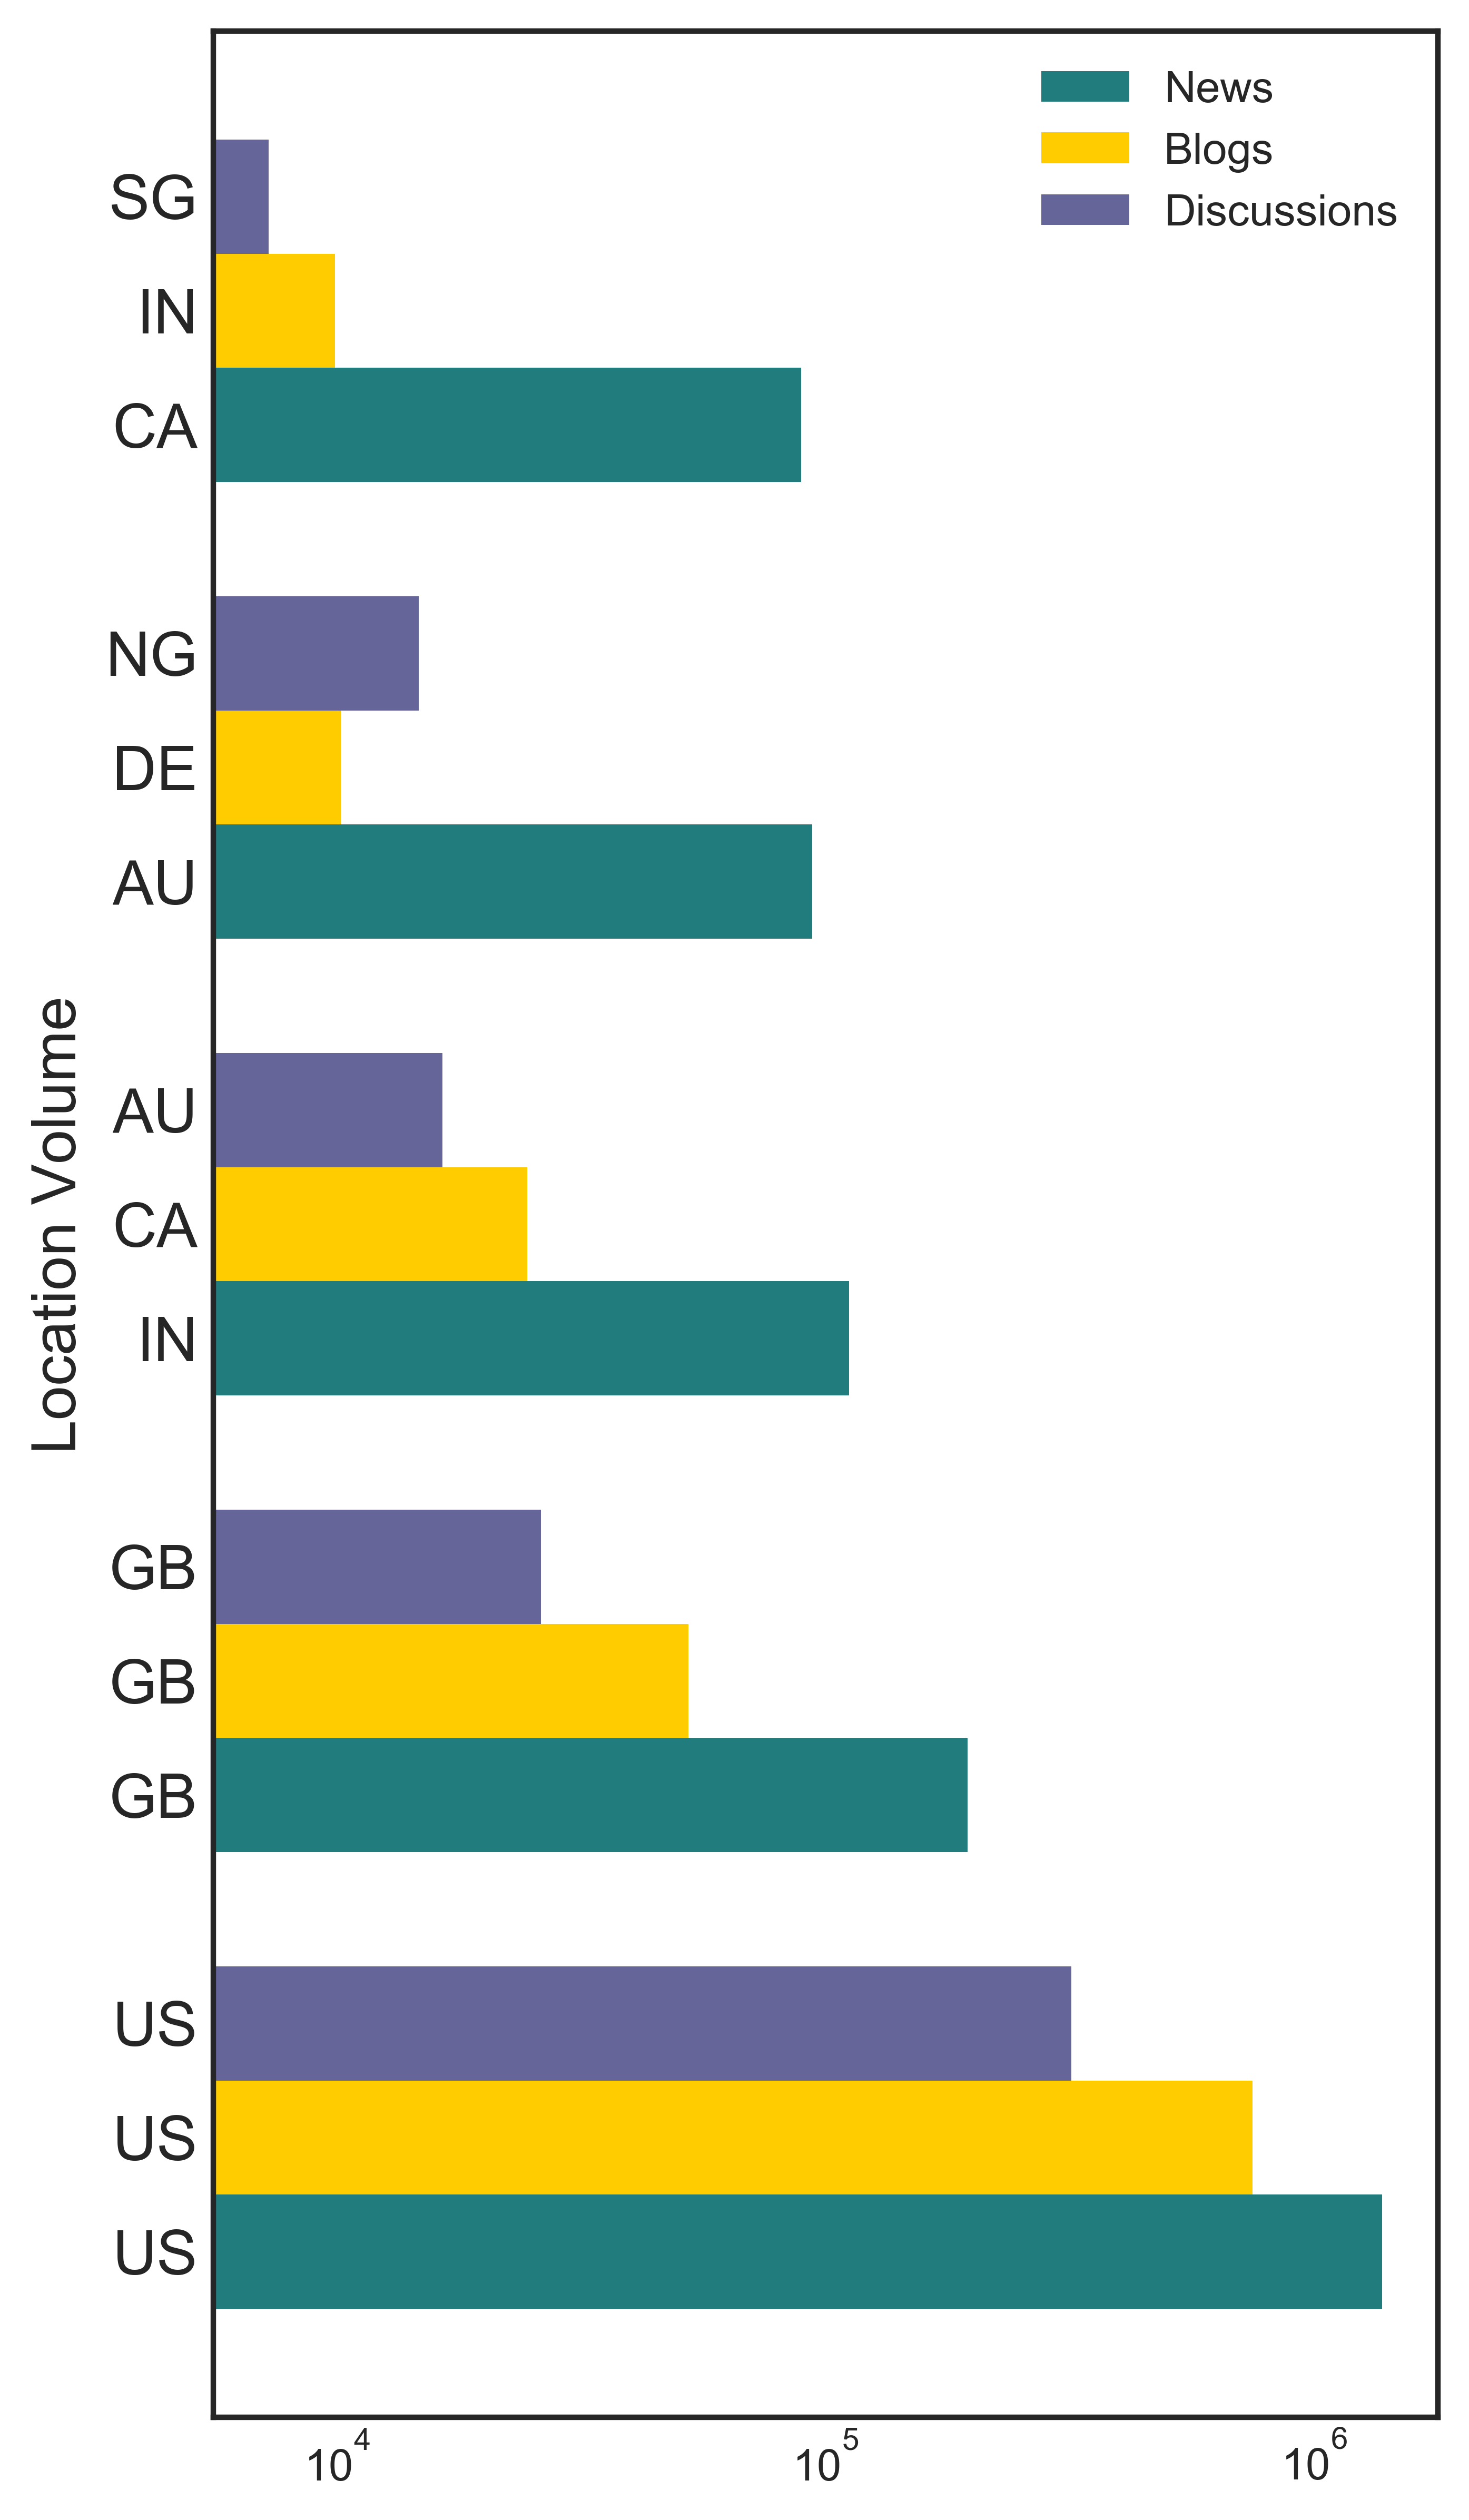

In [4]:
# Check most frequent countries 
# From all the data
N = 5
ind = np.arange(N)    
width = 0.25

list1= ind
list2 = ind+width
list3 = ind+width*2
labels1 = [i[0] for i in Counter(news['country']).most_common(N)]
labels2 = [i[0] for i in Counter(blogs['country']).most_common(N+1) if i[0]==i[0]]
labels3 = [i[0] for i in Counter(discussions['country']).most_common(N)]
indall = []
labelsall = []
for i in range(len(list1)):
    indall.append(list1[i])
    indall.append(list2[i])
    indall.append(list3[i])
    
    labelsall.append(labels1[i])
    labelsall.append(labels2[i])
    labelsall.append(labels3[i])


fig = plt.figure(figsize=(5,10), dpi=mydpi)
plt.barh( ind,
        [i[1] for i in Counter(news['country']).most_common(N)], 
        width, color=elm, label='News')

plt.barh(ind+width, 
        [i[1] for i in Counter(blogs['country']).most_common(N+1) if i[0]==i[0]],
        width, color=orange, label='Blogs')

plt.barh(ind+width*2, 
        [i[1] for i in Counter(discussions['country']).most_common(N)], 
        width, color=purple, label='Discussions')

plt.yticks(indall,labelsall)
plt.ylabel("Location Volume", fontsize=s-4)
plt.yticks(fontsize=s-4)
plt.xscale('log')
plt.legend(loc='best')
plt.show()

In [5]:
news_dates_all = dict(Counter(news['date']))
blog_dates_all = dict(Counter(blogs['date']))
discussion_dates_all = dict(Counter(discussions['date']))

news_volumes_all, blog_volumes_all, discussion_volumes_all = [], [], []
for date in tqdm_notebook(dates):
    news_volumes_all.append(news_dates_all.get(date, 0))
    blog_volumes_all.append(blog_dates_all.get(date, 0))
    discussion_volumes_all.append(discussion_dates_all.get(date, 0))

In [6]:
print ('\t\t', countries)
news_norm_v = [np.mean(list(Counter(news[news['country']==country]['date']).values())) for country in countries]
print ("News Totals:", news_norm_v)
blogs_norm_v = [np.mean(list(Counter(blogs[blogs['country']==country]['date']).values())) for country in countries]
print ("Blogs Totals:", blogs_norm_v)
discussions_norm_v = [np.mean(list(Counter(discussions[discussions['country']==country]['date']).values())) for country in countries]
print ("Discussions Totals:", discussions_norm_v)

		 ['AU', 'GB', 'IN', 'NG', 'US']
News Totals: [1103.9176470588236, 2269.0697674418607, 1313.729411764706, 178.72368421052633, 12409.342342342343]
Blogs Totals: [74.28767123287672, 631.3012048192771, 128.58441558441558, 52.41891891891892, 6566.421052631579]
Discussions Totals: [222.27027027027026, 335.15384615384613, 26.651515151515152, 204.08333333333334, 3355.7473684210527]


In [7]:
print ('\t\t', countries)
news_norm_p = [np.mean(news[news['country']==country]['participants']) for country in countries]
print ("News Totals:", news_norm_p)
blogs_norm_p = [np.mean(blogs[blogs['country']==country]['participants']) for country in countries]
print ("Blogs Totals:", blogs_norm_p)
discussions_norm_p = [np.mean(discussions[discussions['country']==country]['participants']) for country in countries]
print ("Discussions Totals:", discussions_norm_p)

		 ['AU', 'GB', 'IN', 'NG', 'US']
News Totals: [0.8356548335873307, 0.6467920467356769, 0.6995352252679843, 0.7968784510049326, 1.6341553189002473]
Blogs Totals: [0.8727641526830168, 0.5182068017863277, 0.7157862842137158, 0.6860015467904099, 1.0147627749902481]
Discussions Totals: [3.2040977626459144, 8.474906281080253, 4.108584422967596, 6.885599564448074, 22.486693684989774]


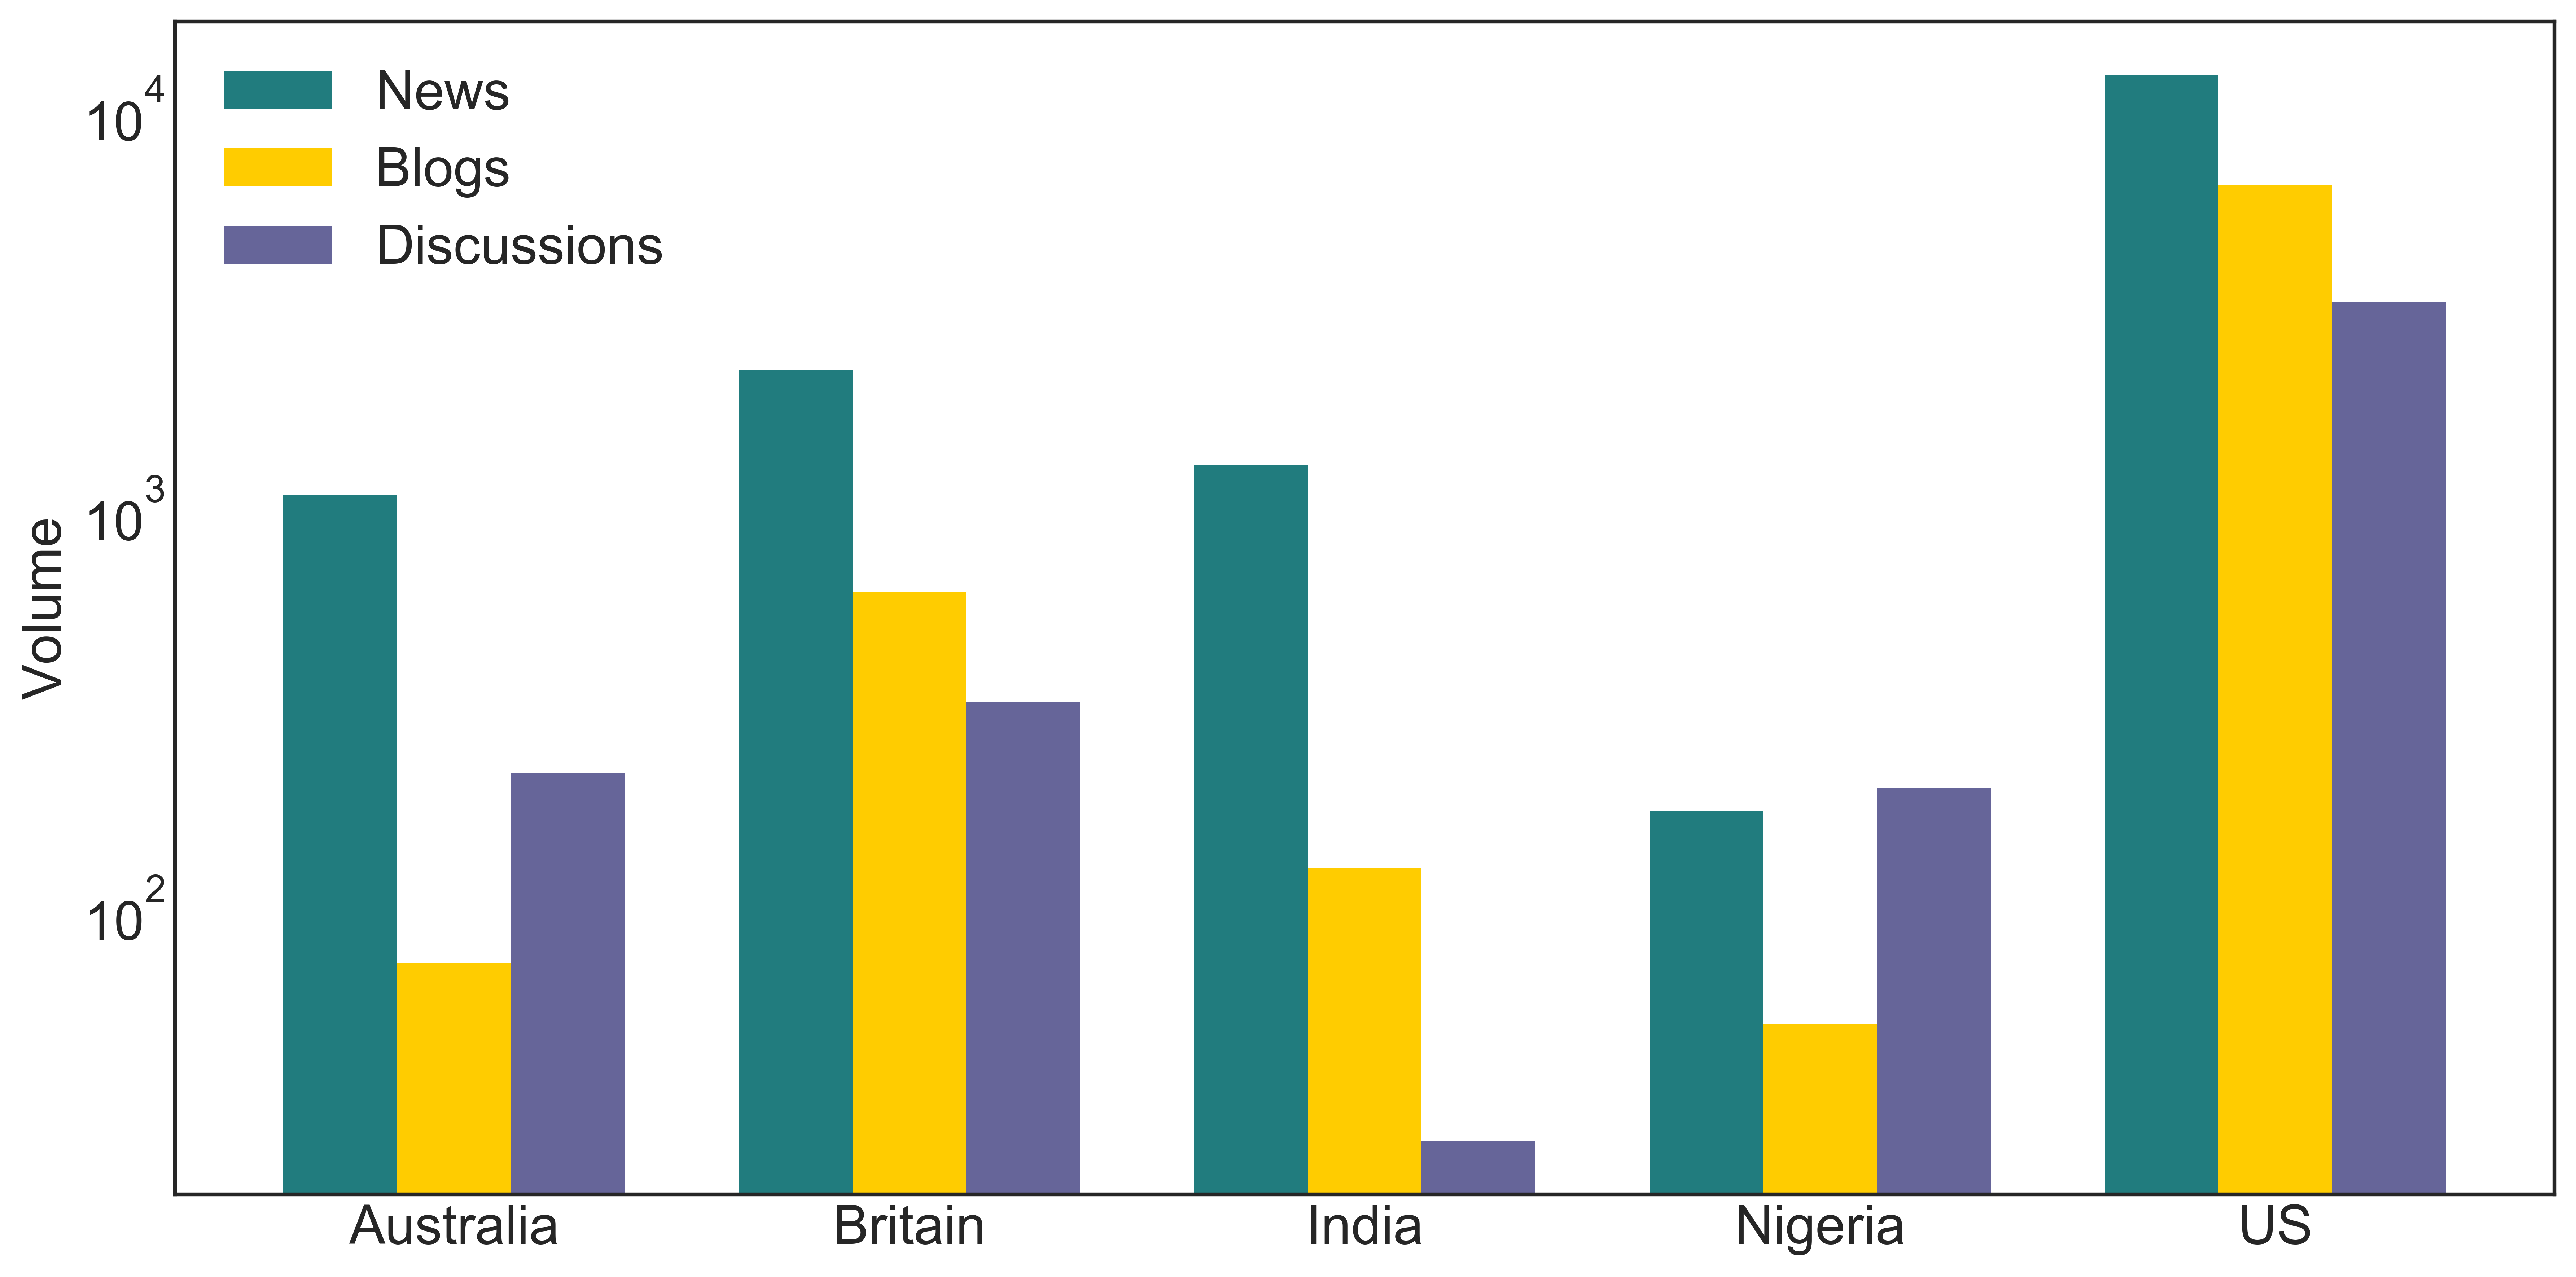

In [8]:
fig = plt.figure(figsize=(12,6), dpi=mydpi)

N=5
ind = np.arange(N)    
width = 0.25

list1= ind
list2 = ind+width
list3 = ind+width*2

plt.bar(ind, 
        news_norm_v, 
        width, color=elm, label='News')

plt.bar(ind+width, 
        blogs_norm_v,
        width, color=orange, label='Blogs')

plt.bar(ind+width*2, 
        discussions_norm_v, 
        width, color=purple, label='Discussions')

plt.xticks(ind+width,country_labels, fontsize=s)
plt.yticks(fontsize=s)
plt.ylabel("Volume", fontsize=s)

plt.yticks(fontsize=s)
plt.yscale('log')
plt.legend(loc='best', fontsize=s)

plt.tight_layout()
plt.show()


In [9]:
news_dates, blog_dates, discussion_dates = [], [], []
for country in tqdm_notebook(countries):
    news_dates.append(dict(Counter(news[news['country']==country]['date'])))
    blog_dates.append(dict(Counter(blogs[blogs['country']==country]['date'])))
    discussion_dates.append(dict(Counter(discussions[discussions['country']==country]['date'])))

In [10]:
news_volumes, blog_volumes, discussion_volumes = [], [], []
for nmap, bmap, dmap in tqdm_notebook(zip(news_dates, blog_dates, discussion_dates)):
    n_volume, b_volume, d_volume = [], [], []
    for date in tqdm_notebook(dates):
        n_volume.append(nmap.get(date, 0))
        b_volume.append(bmap.get(date, 0))
        d_volume.append(dmap.get(date, 0))
    news_volumes.append(n_volume)
    blog_volumes.append(b_volume)
    discussion_volumes.append(d_volume)

In [11]:
news_participants, blog_participants, discussion_participants = [], [], []

for country in tqdm_notebook(countries):
    var_news_df = news[news['country']==country][['date','participants']].groupby('date').agg('sum').reset_index().T.to_dict()
    var_blogs_df = blogs[blogs['country']==country][['date','participants']].groupby('date').agg('sum').reset_index().T.to_dict()
    var_discussions_df = discussions[discussions['country']==country][['date','participants']].groupby('date').agg('sum').reset_index().T.to_dict()
    
    var_news_dict, var_blogs_dict, var_discussions_dict = {}, {}, {}
    
    for k1,k2,k3 in zip(var_news_df.keys(), var_blogs_df.keys(), var_discussions_df.keys()): 
        var_news_dict[var_news_df.get(k1).get('date')] = var_news_df.get(k1).get('participants')
        var_blogs_dict[var_blogs_df.get(k2).get('date')] = var_blogs_df.get(k2).get('participants')
        var_discussions_dict[var_discussions_df.get(k3).get('date')] = var_discussions_df.get(k3).get('participants')
        
    # populate values for each country    
    var_news_values, var_blogs_values, var_discussions_values = [], [], []
    for date in dates:
        var_news_values.append(var_news_dict.get(date, 0))
        var_blogs_values.append(var_blogs_dict.get(date, 0))
        var_discussions_values.append(var_discussions_dict.get(date, 0))
    
    news_participants.append(var_news_values)
    blog_participants.append(var_blogs_values)
    discussion_participants.append(var_discussions_values)
    

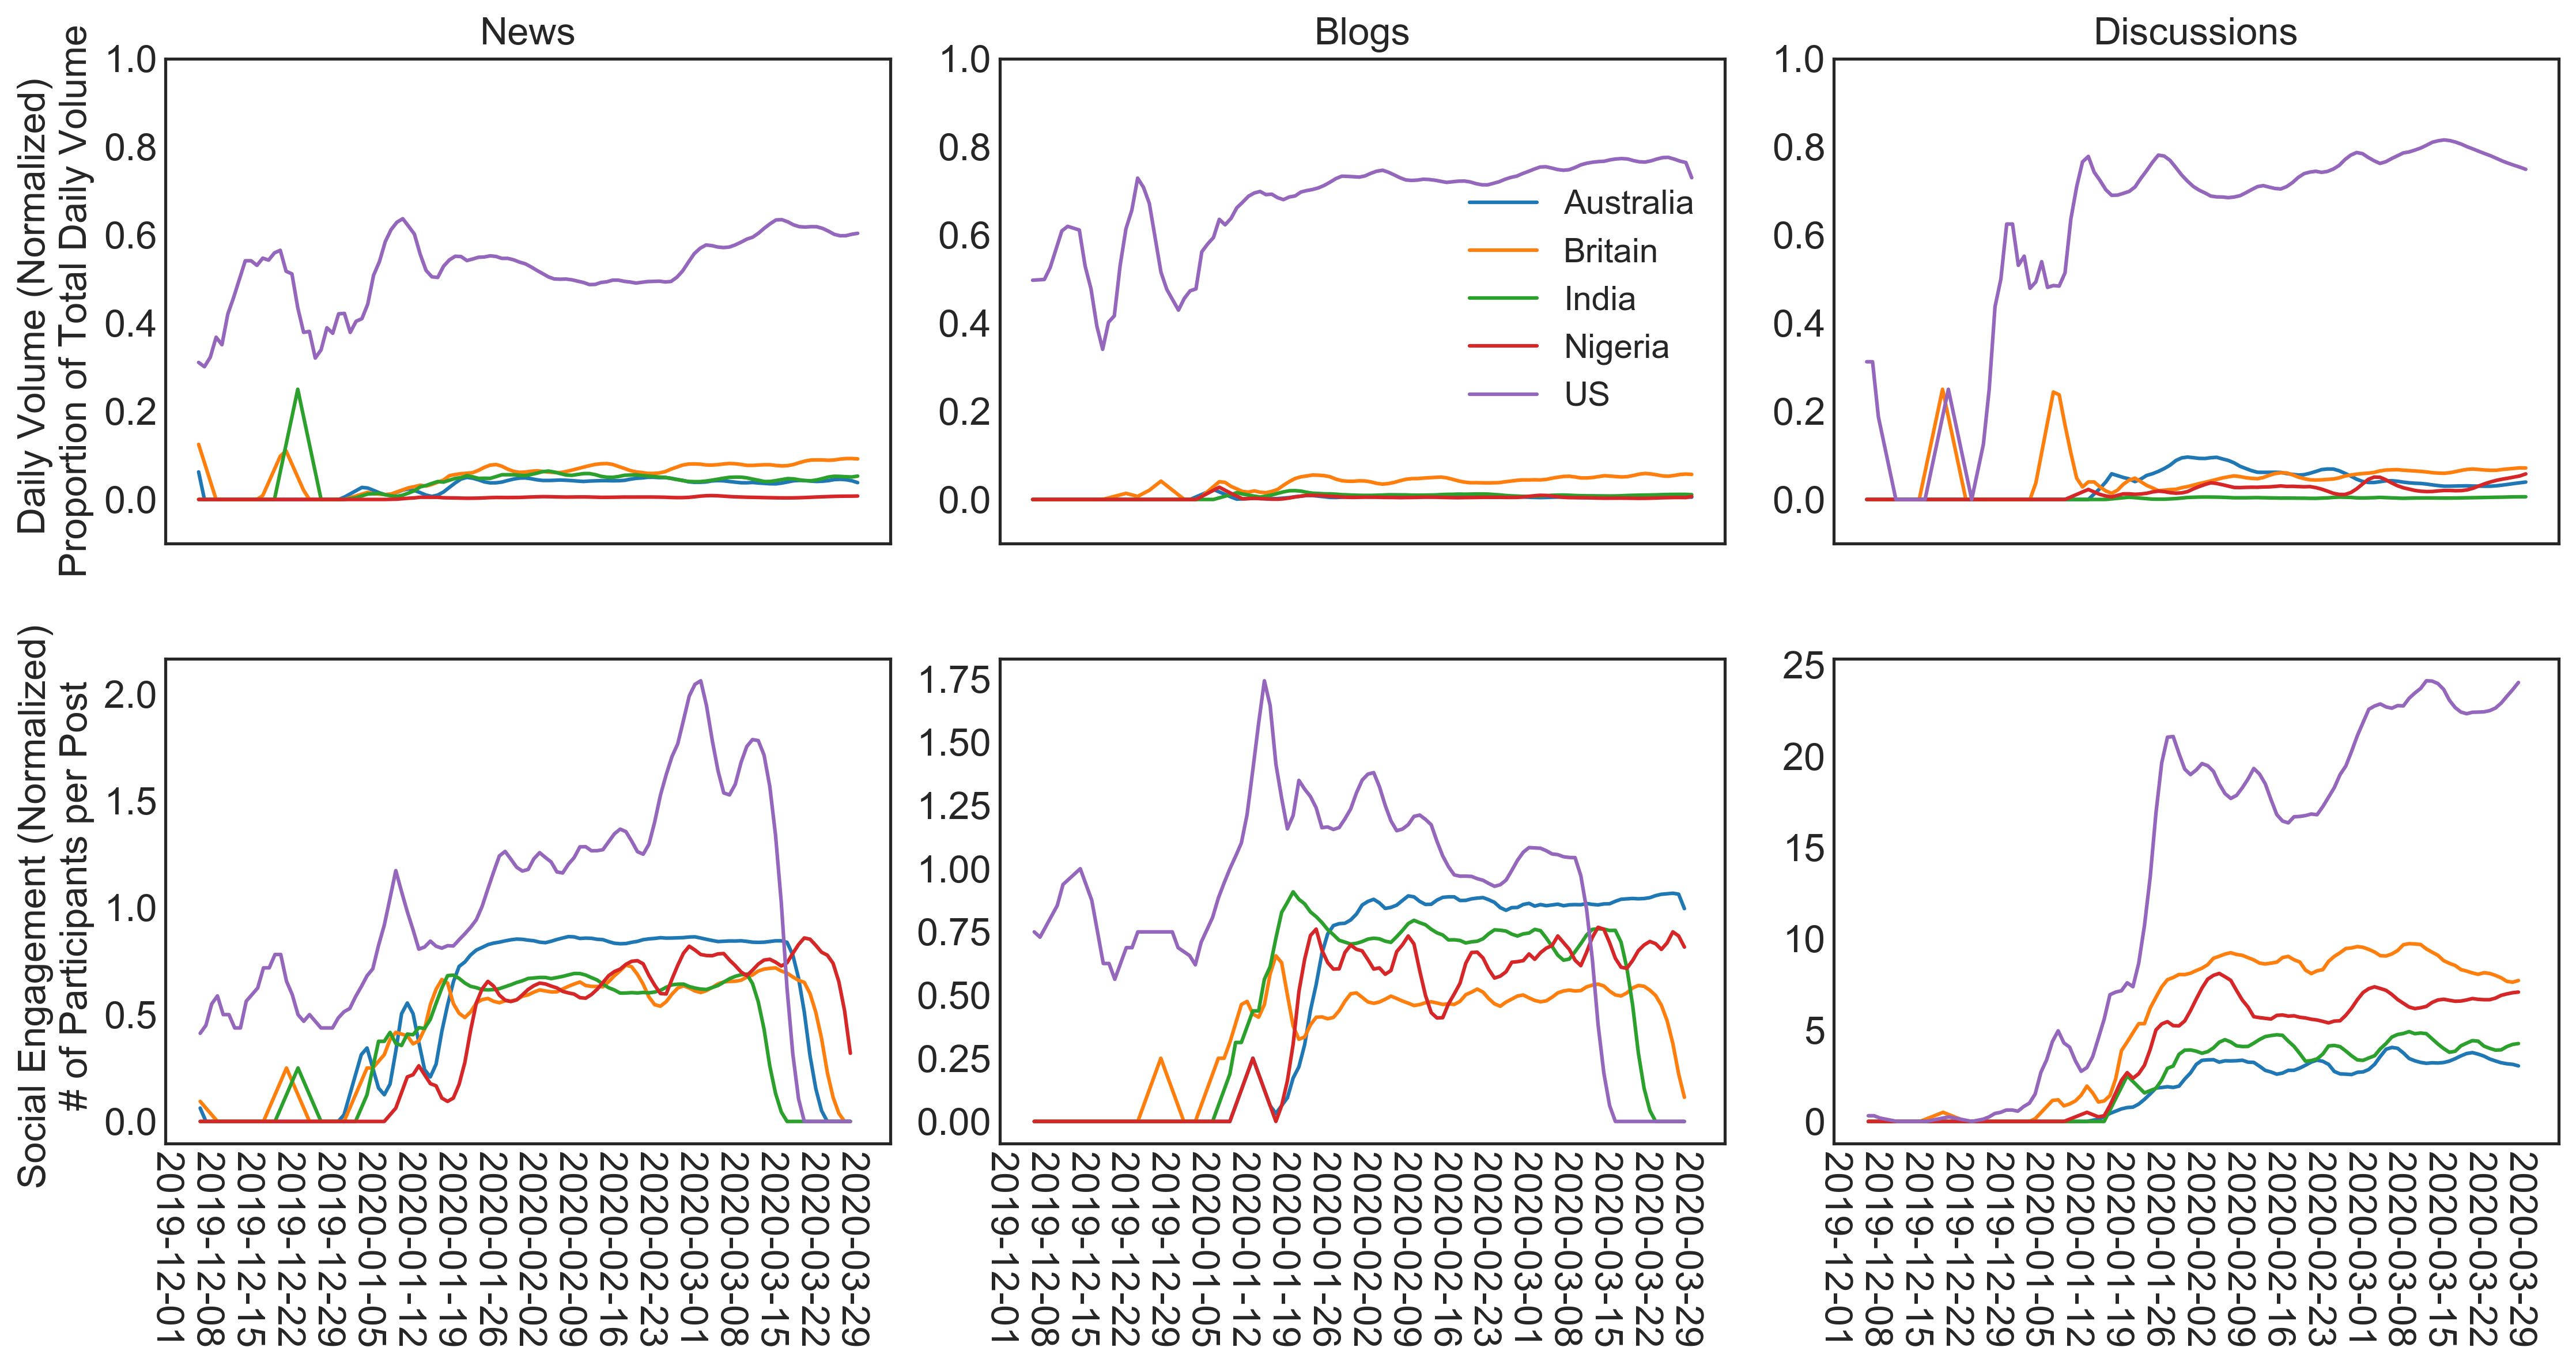

In [12]:
fig = plt.figure(figsize=(15,8), dpi=300)
s=16
roll = 7
ax = plt.subplot(2, 3, 1)
for idx, volume in enumerate(news_volumes):
    plt.plot(dates, 
             pd.Series([np.true_divide(x,y) for x,y in zip(volume, news_volumes_all)]).fillna(0).rolling(roll, win_type='triang').mean(),
             label=country_labels[idx])
plt.xticks([], [])
plt.yticks(fontsize=s)
plt.ylim(-.1,1)
plt.title('News', fontsize=s)
plt.ylabel('Daily Volume (Normalized) \nProportion of Total Daily Volume', fontsize =s)

ax = plt.subplot(2, 3, 2)
for idx, volume in enumerate(blog_volumes):
    plt.plot(dates, 
             pd.Series([np.true_divide(x,y) for x,y in zip(volume, blog_volumes_all)]).fillna(0).rolling(roll, win_type='triang').mean(),
             label=country_labels[idx])
plt.xticks([], [])
plt.yticks(fontsize=s)
plt.ylim(-.1,1)
plt.title('Blogs', fontsize=s)
plt.legend(loc='best', fontsize=s-2)


ax = plt.subplot(2, 3, 3)
for idx, volume in enumerate(discussion_volumes):
    plt.plot(dates, 
             pd.Series([np.true_divide(x,y) for x,y in zip(volume, discussion_volumes_all)]).fillna(0).rolling(roll, win_type='triang').mean(),
             label=country_labels[idx])
plt.xticks([], [])
plt.yticks(fontsize=s)
plt.ylim(-.1,1)
plt.title('Discussions', fontsize=s)

## Divide number of daily participants by daily volume

ax = plt.subplot(2, 3, 4)
for idx, participants in enumerate(news_participants):
    plt.plot(dates, 
             pd.Series([np.true_divide(x,y) for x,y in zip(participants, news_volumes[idx])]).fillna(0).rolling(roll, win_type='triang').mean(),
             label=country_labels[idx])
plt.xticks(np.arange(0, len(dates)+7, 7), rotation=270, fontsize =s)
plt.yticks(fontsize=s)
plt.ylabel('Social Engagement (Normalized) \n # of Participants per Post', fontsize =s)

ax = plt.subplot(2, 3, 5)
for idx, participants in enumerate(blog_participants):
    plt.plot(dates, 
             pd.Series([np.true_divide(x,y) for x,y in zip(participants, blog_volumes[idx])]).fillna(0).rolling(roll, win_type='triang').mean(), 
             label=country_labels[idx])
plt.xticks(np.arange(0, len(dates)+7, 7), rotation=270, fontsize =s)
plt.yticks(fontsize=s)

ax = plt.subplot(2, 3, 6)
for idx, participants in enumerate(discussion_participants):
    plt.plot(dates, 
             pd.Series([np.true_divide(x,y) for x,y in zip(participants, discussion_volumes[idx])]).fillna(0).rolling(roll, win_type='triang').mean(),  
             label=country_labels[idx])
plt.xticks(np.arange(0, len(dates)+7, 7), rotation=270, fontsize =s)
plt.yticks(fontsize=s)

plt.tight_layout()
plt.show()

In [13]:
geo_soc_news = news[['country', 'participants']].groupby('country').agg('sum').reset_index().merge(news[['country', 'date']].groupby('country').agg('count').reset_index())
geo_soc_blogs = blogs[['country', 'participants']].groupby('country').agg('sum').reset_index().merge(blogs[['country', 'date']].groupby('country').agg('count').reset_index())
geo_soc_disc = discussions[['country', 'participants']].groupby('country').agg('sum').reset_index().merge(discussions[['country', 'date']].groupby('country').agg('count').reset_index())

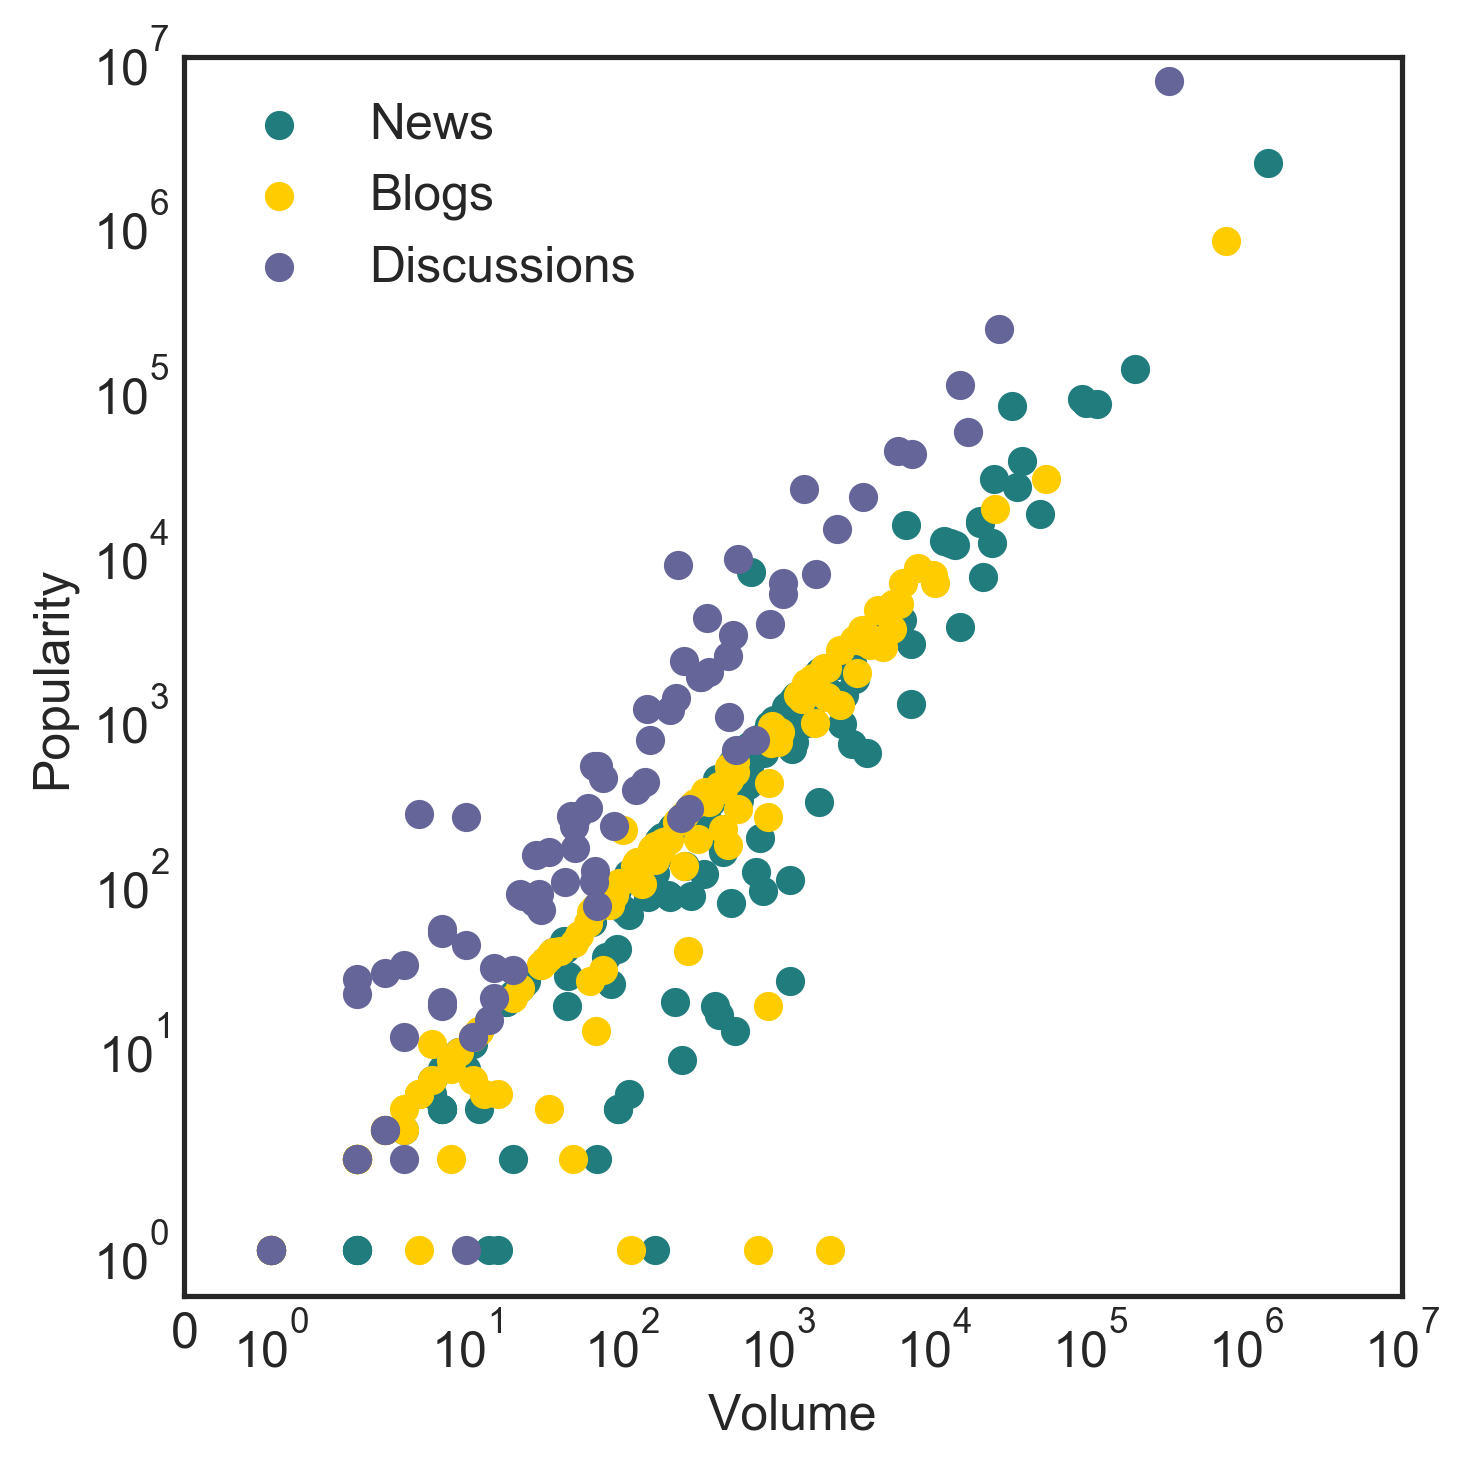

Linear relationship between media volume and popularity. Each dot represents an individual country.


In [14]:
fig = plt.figure(figsize=(5,5), dpi=300)
s=12
plt.scatter(geo_soc_news['date'], geo_soc_news['participants'], label='News', color=elm)
plt.scatter(geo_soc_blogs['date'], geo_soc_blogs['participants'], label='Blogs', color=orange)
plt.scatter(geo_soc_disc['date'], geo_soc_disc['participants'], label='Discussions', color=purple)
plt.xlim(0,1e7)
plt.ylim(.5,1e7)
plt.xticks(fontsize=s)
plt.yticks(fontsize=s)
plt.xscale('symlog')
plt.yscale('symlog')
plt.xlabel('Volume', fontsize=s)
plt.ylabel('Popularity', fontsize=s)
plt.legend(loc='best', fontsize=s)
plt.tight_layout()
plt.show()

print ("Linear relationship between media volume and popularity. Each dot represents an individual country.")

In [15]:
case_dfs = []
for country in tqdm_notebook(countries):
    case_df = cases[cases[' Country_code']==country][['Date_reported', ' Cumulative_cases', ' New_cases']]
    case_df.columns = ['date', 'cum_cases', 'new_cases']
    case_df['date'] = pd.to_datetime(case_df['date']).dt.strftime('%Y-%m-%d')
    case_df = case_df.merge(news[news['country']==country][['date', 'participants', 'sentiment']].groupby('date').agg('mean').reset_index(),
               on='date',
               how='left')
    case_df = case_df.dropna()
    case_dfs.append(case_df)  

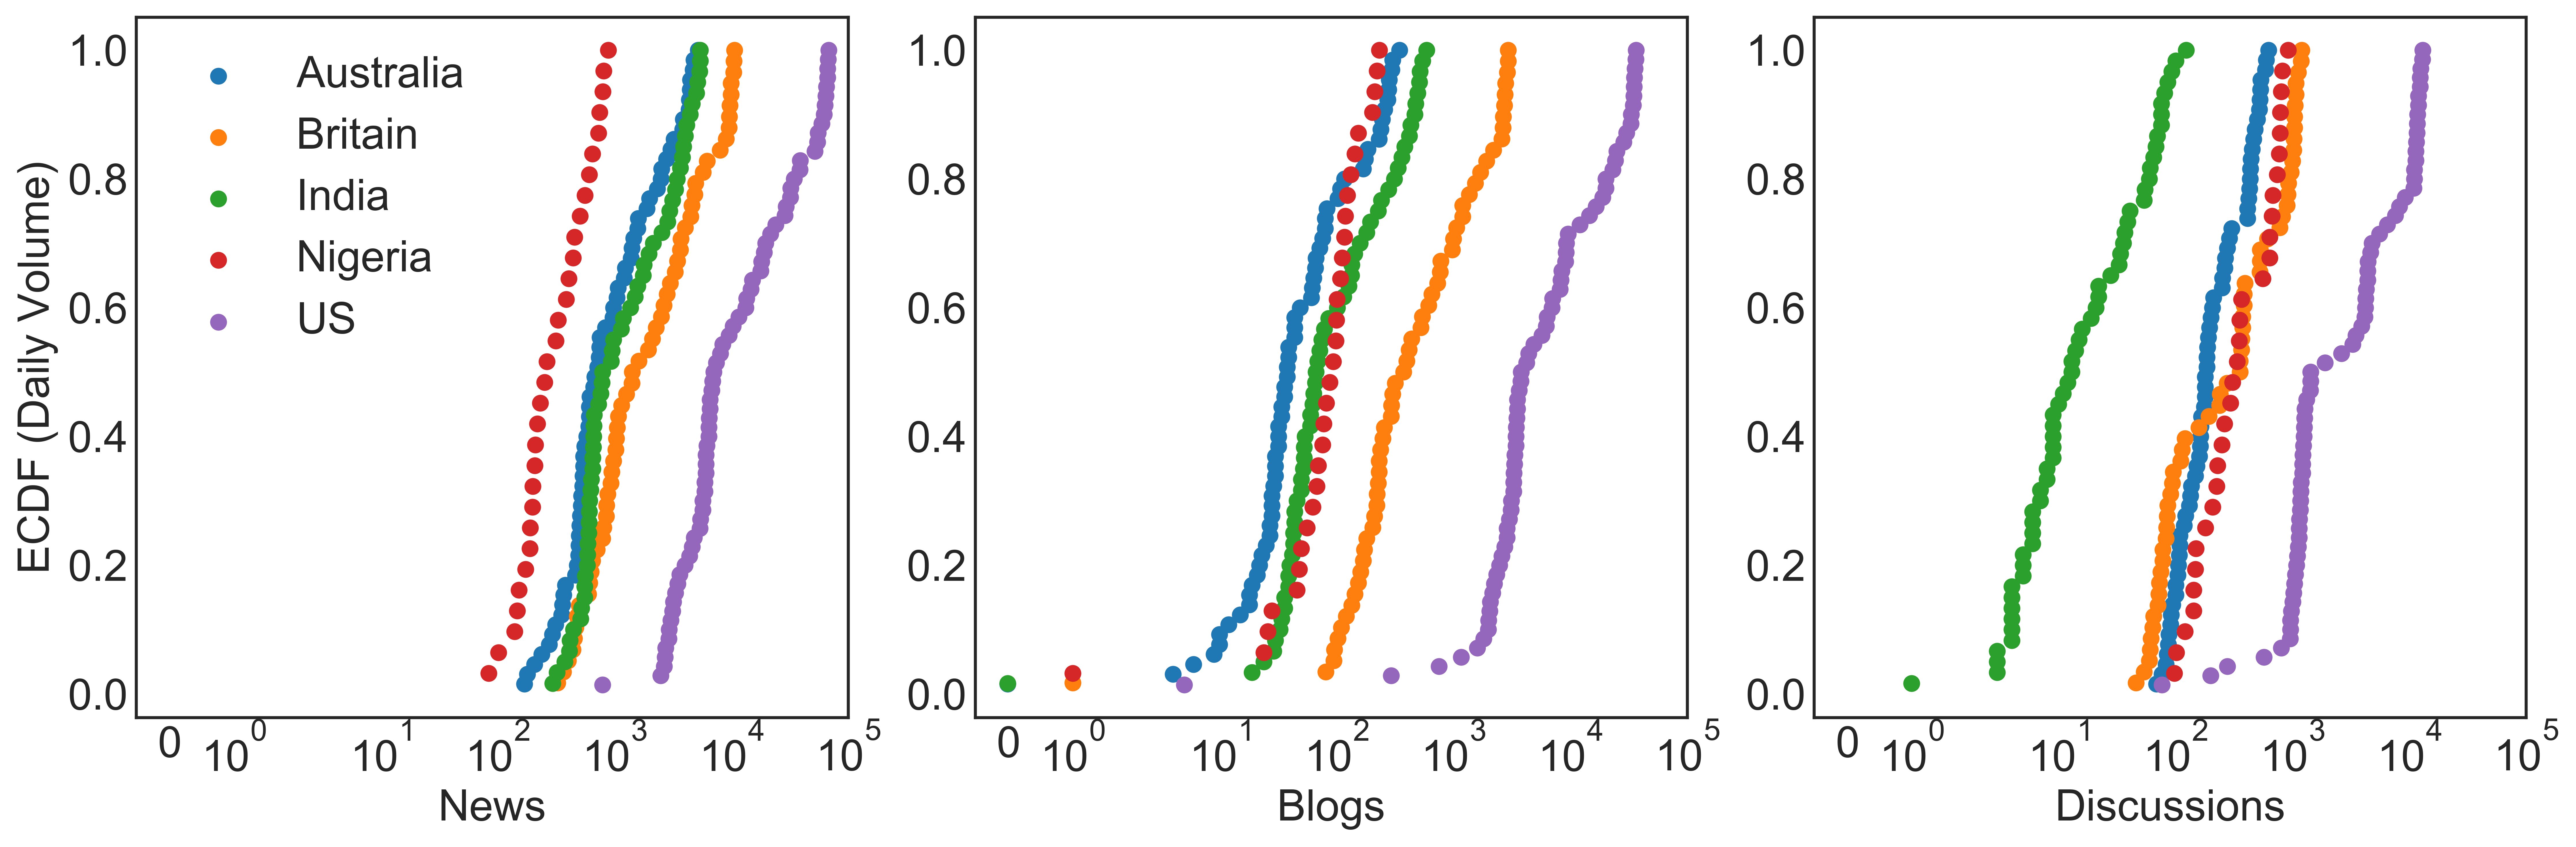

In [16]:
fig = plt.figure(figsize=(15,5), dpi=600)
s=18
ax = plt.subplot(1, 3, 1)

for i in np.arange(5):
    start = dates.index(min(case_dfs[i]['date']))
    n = len(news_volumes[i][start:])
    plt.scatter(sorted(news_volumes[i][start:]), 
                np.arange(1, n+1) / n, 
                label=country_labels[i])
plt.xticks(fontsize=s)
plt.yticks(fontsize=s)
plt.xscale('symlog')
plt.xlim(-.5,1e5)
plt.ylabel('ECDF (Daily Volume)', fontsize=s)
plt.xlabel('News', fontsize=s)
plt.legend(loc='best', fontsize=s)

ax = plt.subplot(1, 3, 2)

for i in np.arange(5):
    start = dates.index(min(case_dfs[i]['date']))
    n = len(blog_volumes[i][start:])
    plt.scatter(sorted(blog_volumes[i][start:]), 
                np.arange(1, n+1) / n, 
                label=country_labels[i])
plt.xticks(fontsize=s)
plt.yticks(fontsize=s)
plt.xscale('symlog')
plt.xlim(-.5,1e5)
plt.xlabel('Blogs', fontsize=s)

ax = plt.subplot(1, 3, 3)
for i in np.arange(5):
    start = dates.index(min(case_dfs[i]['date']))
    n = len(discussion_volumes[i][start:])
    plt.scatter(sorted(discussion_volumes[i][start:]), 
                np.arange(1, n+1) / n, 
                label=country_labels[i])
plt.xticks(fontsize=s)
plt.yticks(fontsize=s)
plt.xscale('symlog')
plt.xlim(-.5,1e5)
plt.xlabel('Discussions', fontsize=s)

plt.tight_layout()
plt.show()

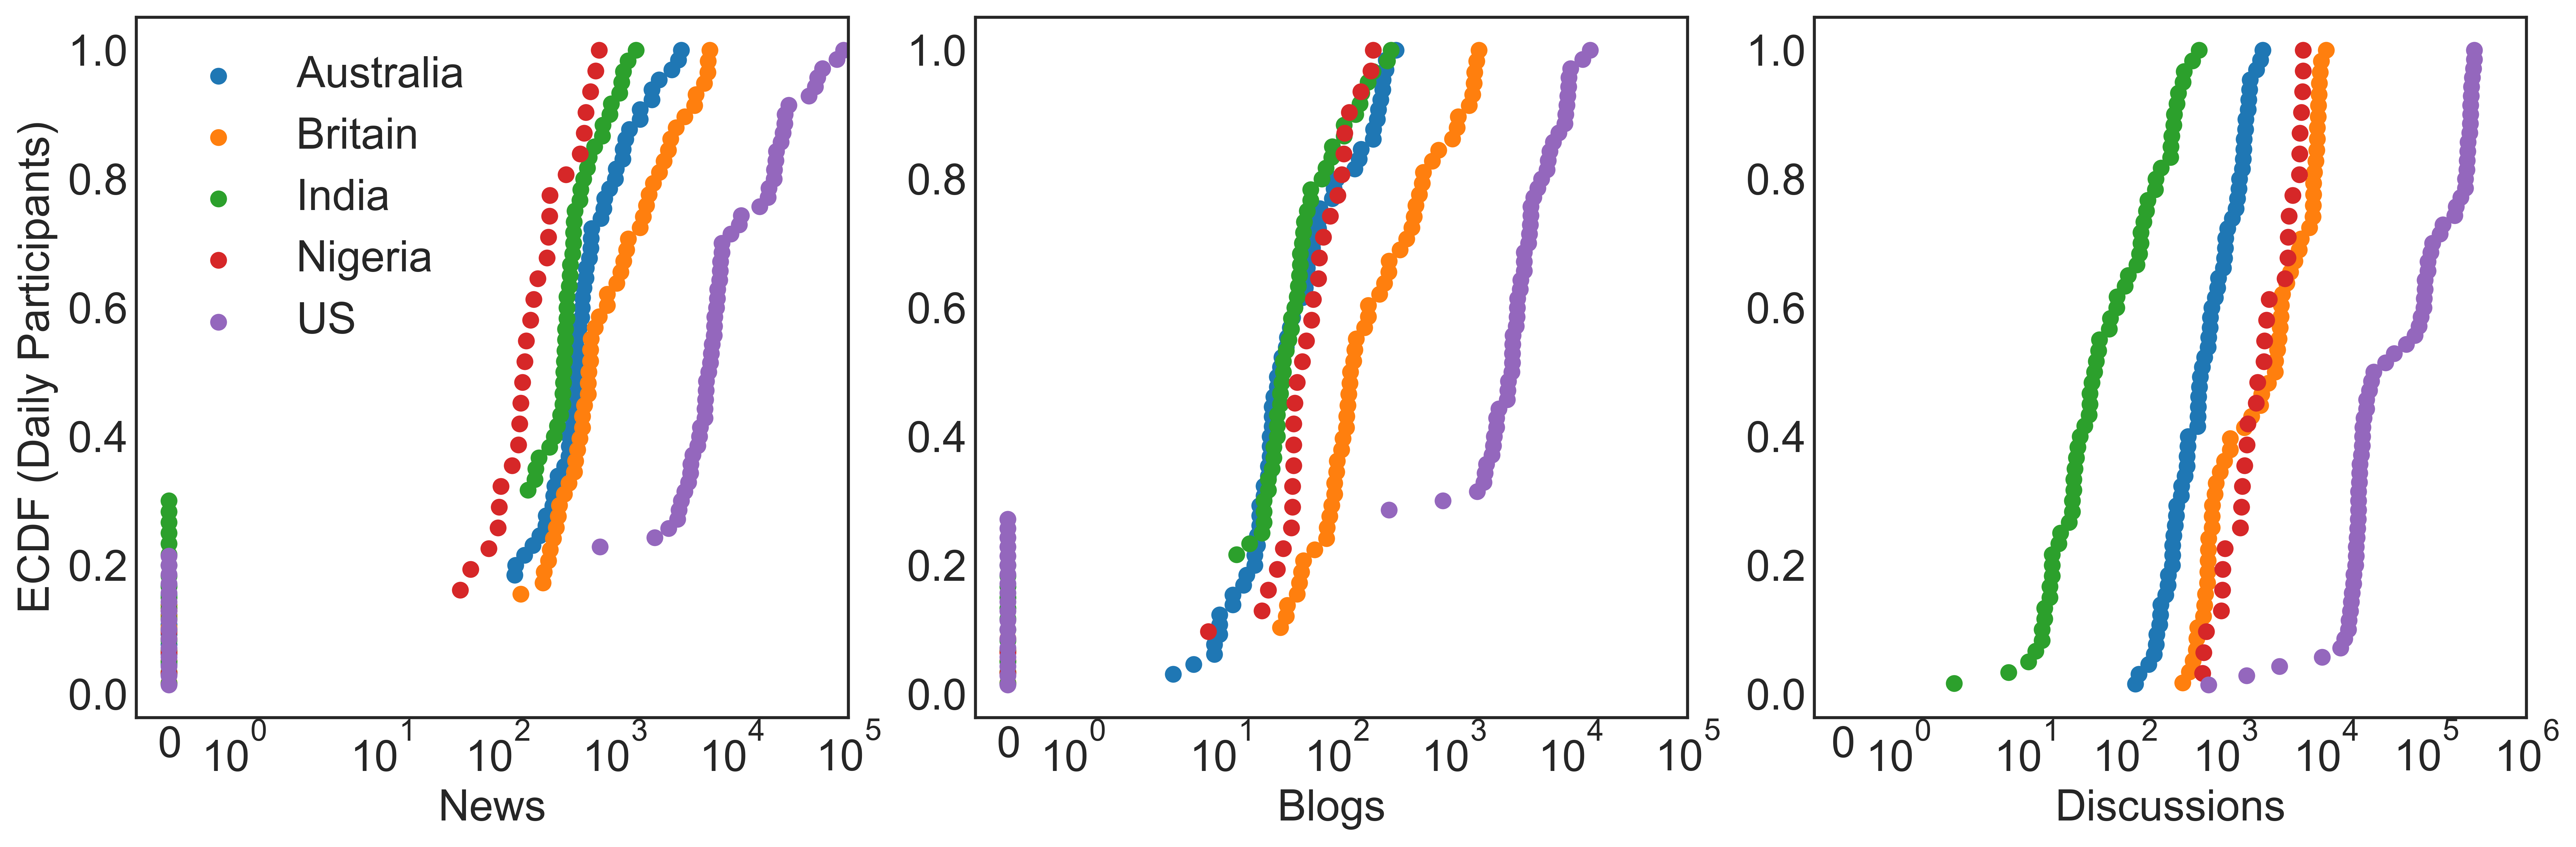

In [17]:
fig = plt.figure(figsize=(15,5), dpi=600)
s=18
ax = plt.subplot(1, 3, 1)

for i in np.arange(5):
    start = dates.index(min(case_dfs[i]['date']))
    n = len(news_participants[i][start:])
    plt.scatter(sorted(news_participants[i][start:]), 
                np.arange(1, n+1) / n, 
                label=country_labels[i])
plt.xticks(fontsize=s)
plt.yticks(fontsize=s)   
plt.xscale('symlog')
plt.xlim(-.5,1e5)
plt.ylabel('ECDF (Daily Participants)', fontsize=s)
plt.xlabel('News', fontsize=s)
plt.legend(loc='best', fontsize = s)

ax = plt.subplot(1, 3, 2)

for i in np.arange(5):
    start = dates.index(min(case_dfs[i]['date']))
    n = len(blog_participants[i][start:])
    plt.scatter(sorted(blog_participants[i][start:]), 
                np.arange(1, n+1) / n, 
                label=country_labels[i])
plt.xticks(fontsize=s)
plt.yticks(fontsize=s)  
plt.xscale('symlog')
plt.xlim(-.5,1e5)
plt.xlabel('Blogs', fontsize=s)

ax = plt.subplot(1, 3, 3)
for i in np.arange(5):
    start = dates.index(min(case_dfs[i]['date']))
    n = len(discussion_participants[i][start:])
    plt.scatter(sorted(discussion_participants[i][start:]), 
                np.arange(1, n+1) / n, 
                label=country_labels[i])
plt.xticks(fontsize=s)
plt.yticks(fontsize=s)  
plt.xscale('symlog')
plt.xlim(-.5,1e6)
plt.xlabel('Discussions', fontsize=s)

plt.tight_layout()
plt.show()

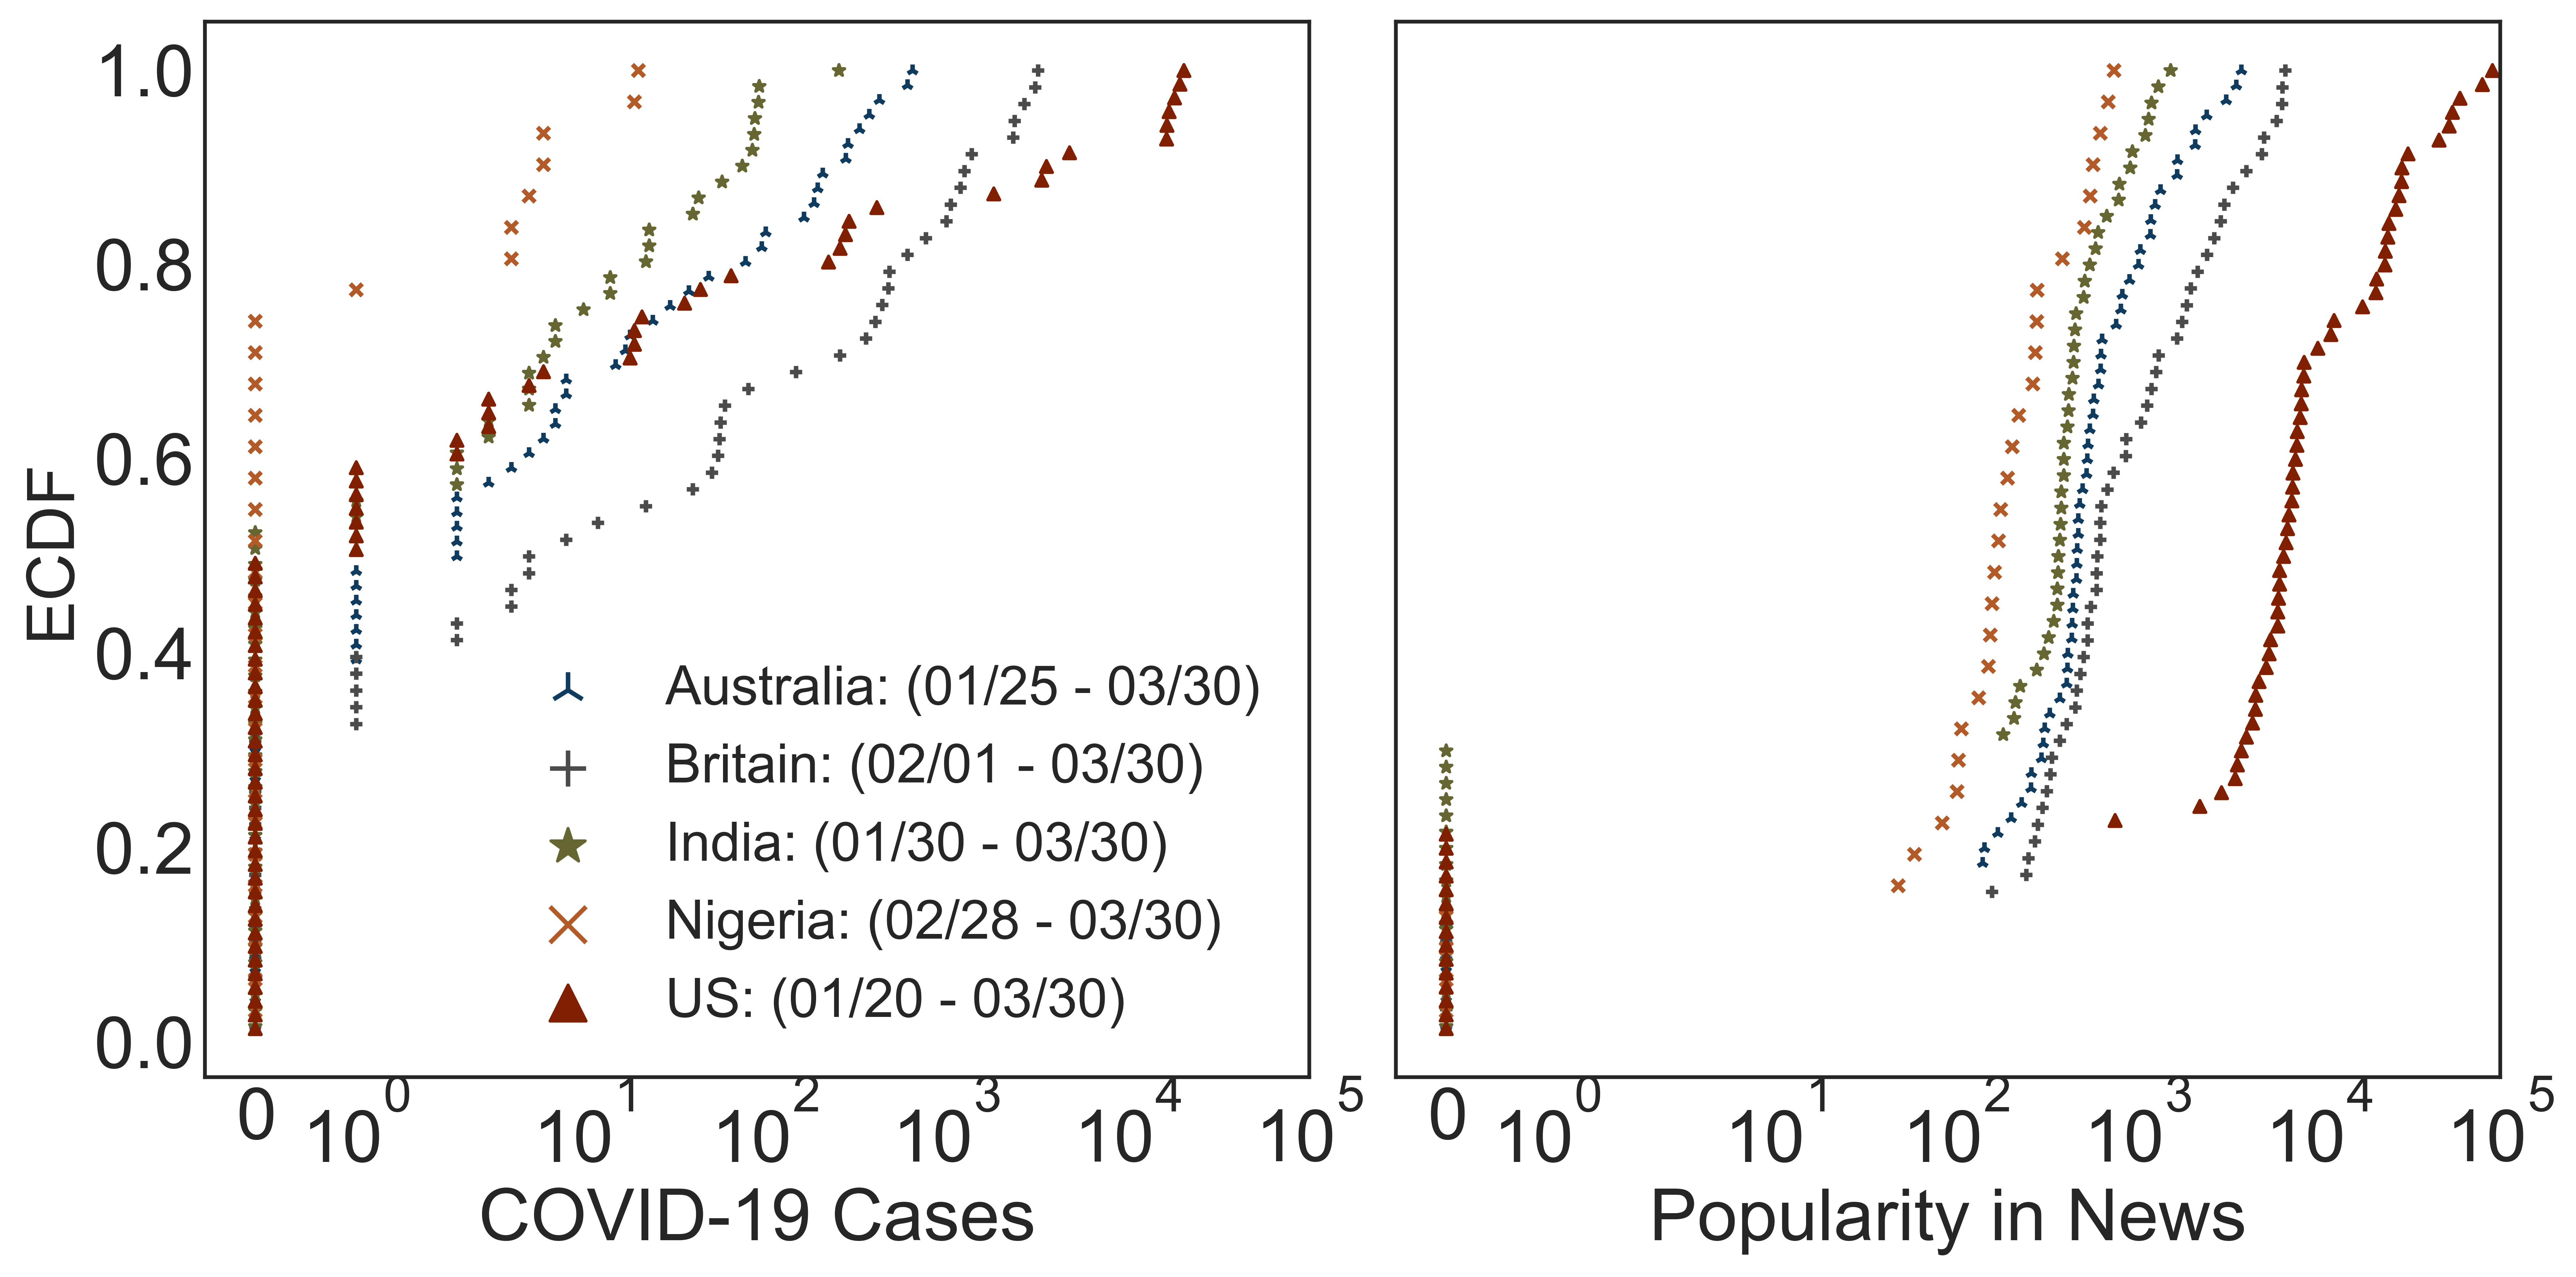

In [18]:
fig = plt.figure(figsize=(12,6), dpi=600)
s = 24
colors = ['#0F3B5F', '#4B4B4B', '#666633', '#B25A28', '#802000']
markers = ['2', '+', '*','x','^' ]
ax = plt.subplot(1, 2, 1)

for i in range(5):
    n = len(case_dfs[i])
    plt.scatter(sorted(case_dfs[i]['new_cases']), 
                np.arange(1, n+1) / n,
                s=16,
                c=colors[i],
                marker=markers[i],
               label='{0}: ({1} - 03/30)'.format(country_labels[i], min(case_dfs[i]['date'])[5:].replace('-','/')))
plt.xticks(fontsize=s)
plt.yticks(fontsize=s) 
plt.xscale('symlog')
plt.xlim(-.5,1e5)
plt.ylabel('ECDF', fontsize=s-2)
plt.xlabel('COVID-19 Cases', fontsize=s)
plt.legend(loc='best', markerscale=3, fontsize=s-6)

ax = plt.subplot(1, 2, 2)

for i in np.arange(5):
    start = dates.index(min(case_dfs[i]['date']))
    n = len(news_participants[i][start:])
    plt.scatter(sorted(news_participants[i][start:]), 
                np.arange(1, n+1) / n, 
                s=16,
                marker=markers[i],
                c=colors[i],
                label=country_labels[i])
plt.xticks(fontsize=s)
plt.yticks(fontsize=s)  
plt.yticks([], [])
plt.xscale('symlog')
plt.xlim(-.5,1e5)
plt.xlabel('Popularity in News', fontsize=s)


plt.tight_layout()
plt.show()

In [19]:
for i,j in zip([0,1], [54,38]):
    n = len(case_dfs[i])
    x = sorted(case_dfs[i]['new_cases'])
    y = np.arange(1, n+1) / n
    
    print ("COVID-19 cases at or below {0} are observed for a fraction of {1} of the cases in {2}.".format(x[j], y[j],country_labels[i]))

COVID-19 cases at or below 101 are observed for a fraction of 0.8333333333333334 of the cases in Australia.
COVID-19 cases at or below 81 are observed for a fraction of 0.6724137931034483 of the cases in Britain.


In [20]:
for i,j in zip([4,1], [15,48]):
    n = len(news_participants[i][start:])
    x = sorted(news_participants[i][start:])
    y = np.arange(1, n+1) / n
    
    print ("Up to a {0} comments are observed in {1} of news articles in {2}.".format(x[j], y[j],country_labels[i]))

Up to a 752 comments are observed in 0.22857142857142856 of news articles in US.
Up to a 1044 comments are observed in 0.7 of news articles in Britain.


In [21]:
def get_media_df():

    varx_countries = []
    varx_volume = []
    varx_popularity = []
    varx_engagement = []

    varx = news[['country', 'date', 'participants', 'replies']]

    for country in tqdm_notebook(news['country'].unique()):
        proc = 0
        try:
            min_date = case_dates_df[('Date_reported', 'min')][country]
            max_date = case_dates_df[('Date_reported', 'max')][country]
            temp_df = varx[(varx['country']==country) &(varx['date']>=min_date) & (varx['date']<=max_date)].groupby('country').agg('max').reset_index()
            vol = len(varx[(varx['country']==country) &(varx['date']>=min_date) & (varx['date']<=max_date)])
            proc = 1
            
            if len(temp_df) and proc:
                varx_volume.append(vol)
                varx_countries.append(country)
                varx_popularity.append(temp_df.iloc[0]['participants'])
                varx_engagement.append(temp_df.iloc[0]['replies'])
        except:
            pass
            
    varx_df = pd.DataFrame()
    varx_df['country'] = varx_countries
    varx_df['volume'] = varx_volume
    varx_df['popularity'] = varx_popularity
    varx_df['engagement'] = varx_engagement

    return varx_df

In [22]:
country_media_df=get_media_df()
corr_df = country_media_df.merge(covid_df, on='country', how='left')
corr_df[corr_df.columns[1:]].corr()

volume  popularity  engagement  cases
volume     1.000   0.831       0.830       0.762 
popularity 0.831   1.000       0.960       0.618 
engagement 0.830   0.960       1.000       0.609 
cases      0.762   0.618       0.609       1.000

The cumulative number of COVID-19 cases is strongly correlated with news media volume (r=0.761, p<0.001), popularity (r=0.618, p<0.001), and engagement (r=0.608, p<0.001) in overlapping periods between each country's incidence and news media for each of the 55 countries where we have both COVID-19 data and media data.

In [23]:
print (stats.pearsonr(corr_df['cases'], corr_df['volume']))
print (stats.pearsonr(corr_df['cases'], corr_df['popularity']))
print (stats.pearsonr(corr_df['cases'], corr_df['engagement']))

(0.7615908555154631, 1.46563412056336e-11)
(0.6175474299866291, 5.106144617907648e-07)
(0.6086473321631755, 8.224632712423384e-07)
